<a href="https://colab.research.google.com/github/ryannovianno9/RiCek_RipeChecker/blob/main/Fetal%20Health%20Classification%20with%20SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Problem Statement

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

* Normal
* Suspect
* Pathological

Dataset = https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Cakap DS/fetal_health.csv")

In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Data Understanding

In [ ]:
df.shape

(2126, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000




* Semua kolom termasuk kolom dengan nilai numerik sehingga tidak perlu dilakukan encoding`



## Data Preprocessing

In [ ]:
df.duplicated().sum()

13

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
baseline value,0
accelerations,0
fetal_movement,0
uterine_contractions,0
light_decelerations,0
severe_decelerations,0
prolongued_decelerations,0
abnormal_short_term_variability,0
mean_value_of_short_term_variability,0
percentage_of_time_with_abnormal_long_term_variability,0


In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,...,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000,2113.000000
mean,133.304780,0.003188,0.009517,0.004387,0.001901,0.000003,0.000159,46.993848,1.335021,9.795078,...,93.564600,164.099858,4.077142,0.325603,137.454330,134.599621,138.089446,18.907241,0.318504,1.303833
std,9.837451,0.003871,0.046804,0.002941,0.002966,0.000057,0.000592,17.177782,0.884368,18.337073,...,29.562269,17.945175,2.951664,0.707771,16.402026,15.610422,14.478957,29.038766,0.611075,0.614279
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,93.000000,162.000000,4.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000




* Terdapat 13 nilai duplikat
* Tidak ada missing values
* Ada beberapa kolom yang memiliki standar deviasi yang sangat kecil sehingga bentuk penyebarannya relatif mirip, seperti light_decelarations, severe_decelarations, dan prolongued_decelarations



## EDA

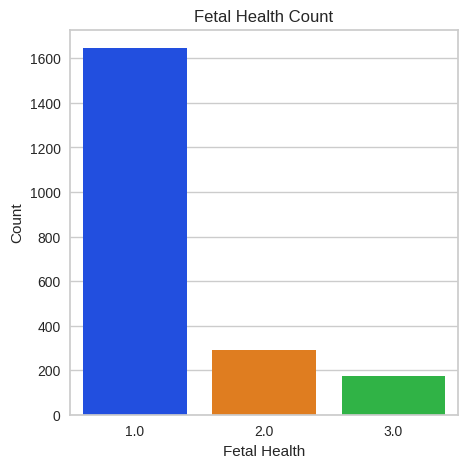

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='fetal_health',data=df, palette='bright')
plt.title('Fetal Health Count')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.show()



1. Normal
2. Suspect
3. Pathological

Terdapat perbedaan jumlah data yang sangat signifikan antar kelas, data ini tidak seimbang



In [ ]:
df['fetal_health'].value_counts()

,count
fetal_health,
1.0,1646
2.0,292
3.0,175


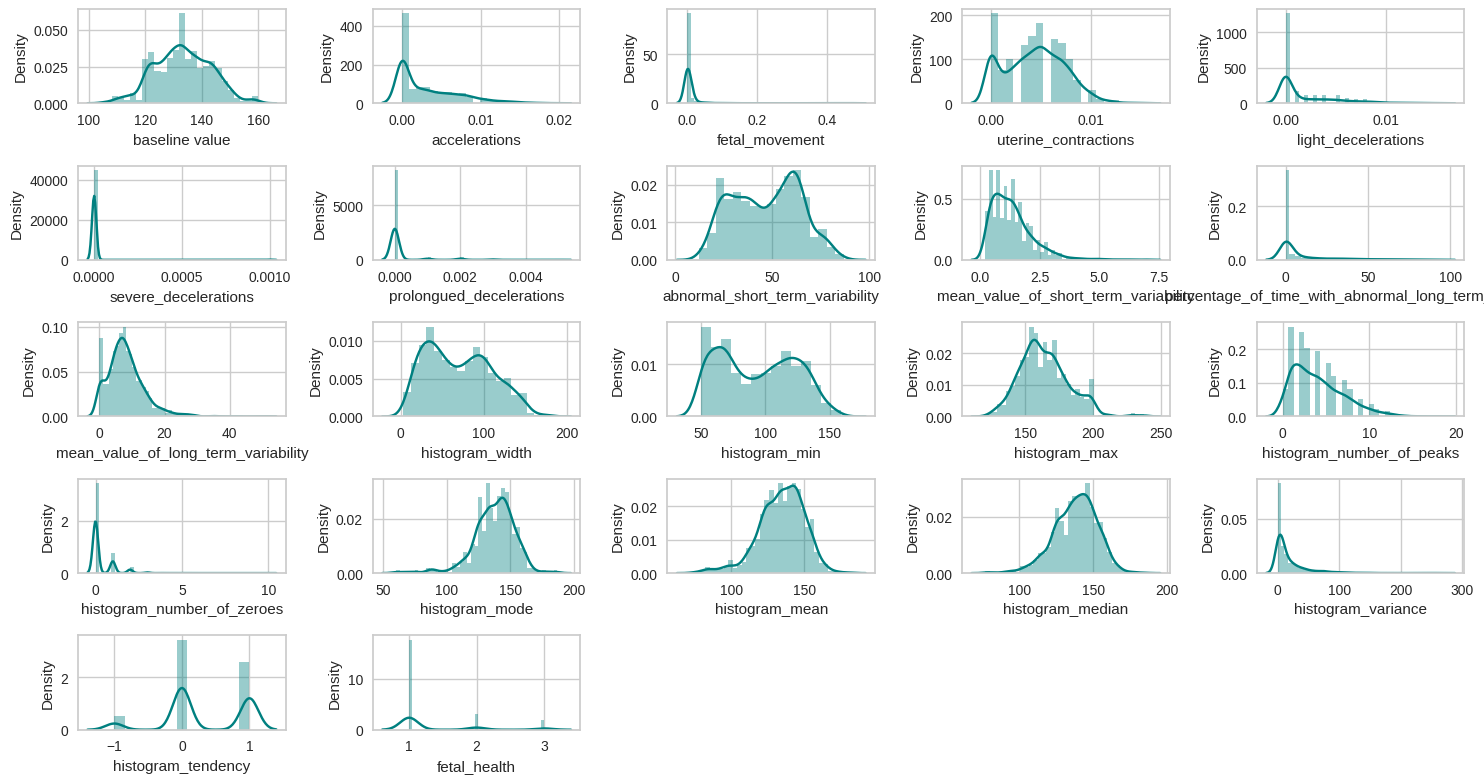

In [ ]:
plt.figure(figsize=(15,8))
for i, column_name in enumerate(df.columns):
    plt.subplot(5, 5, i+1)
    sns.distplot(df[column_name], color='teal')
    plt.tight_layout()

Beberapa kolom terlihat berdistribusi normal

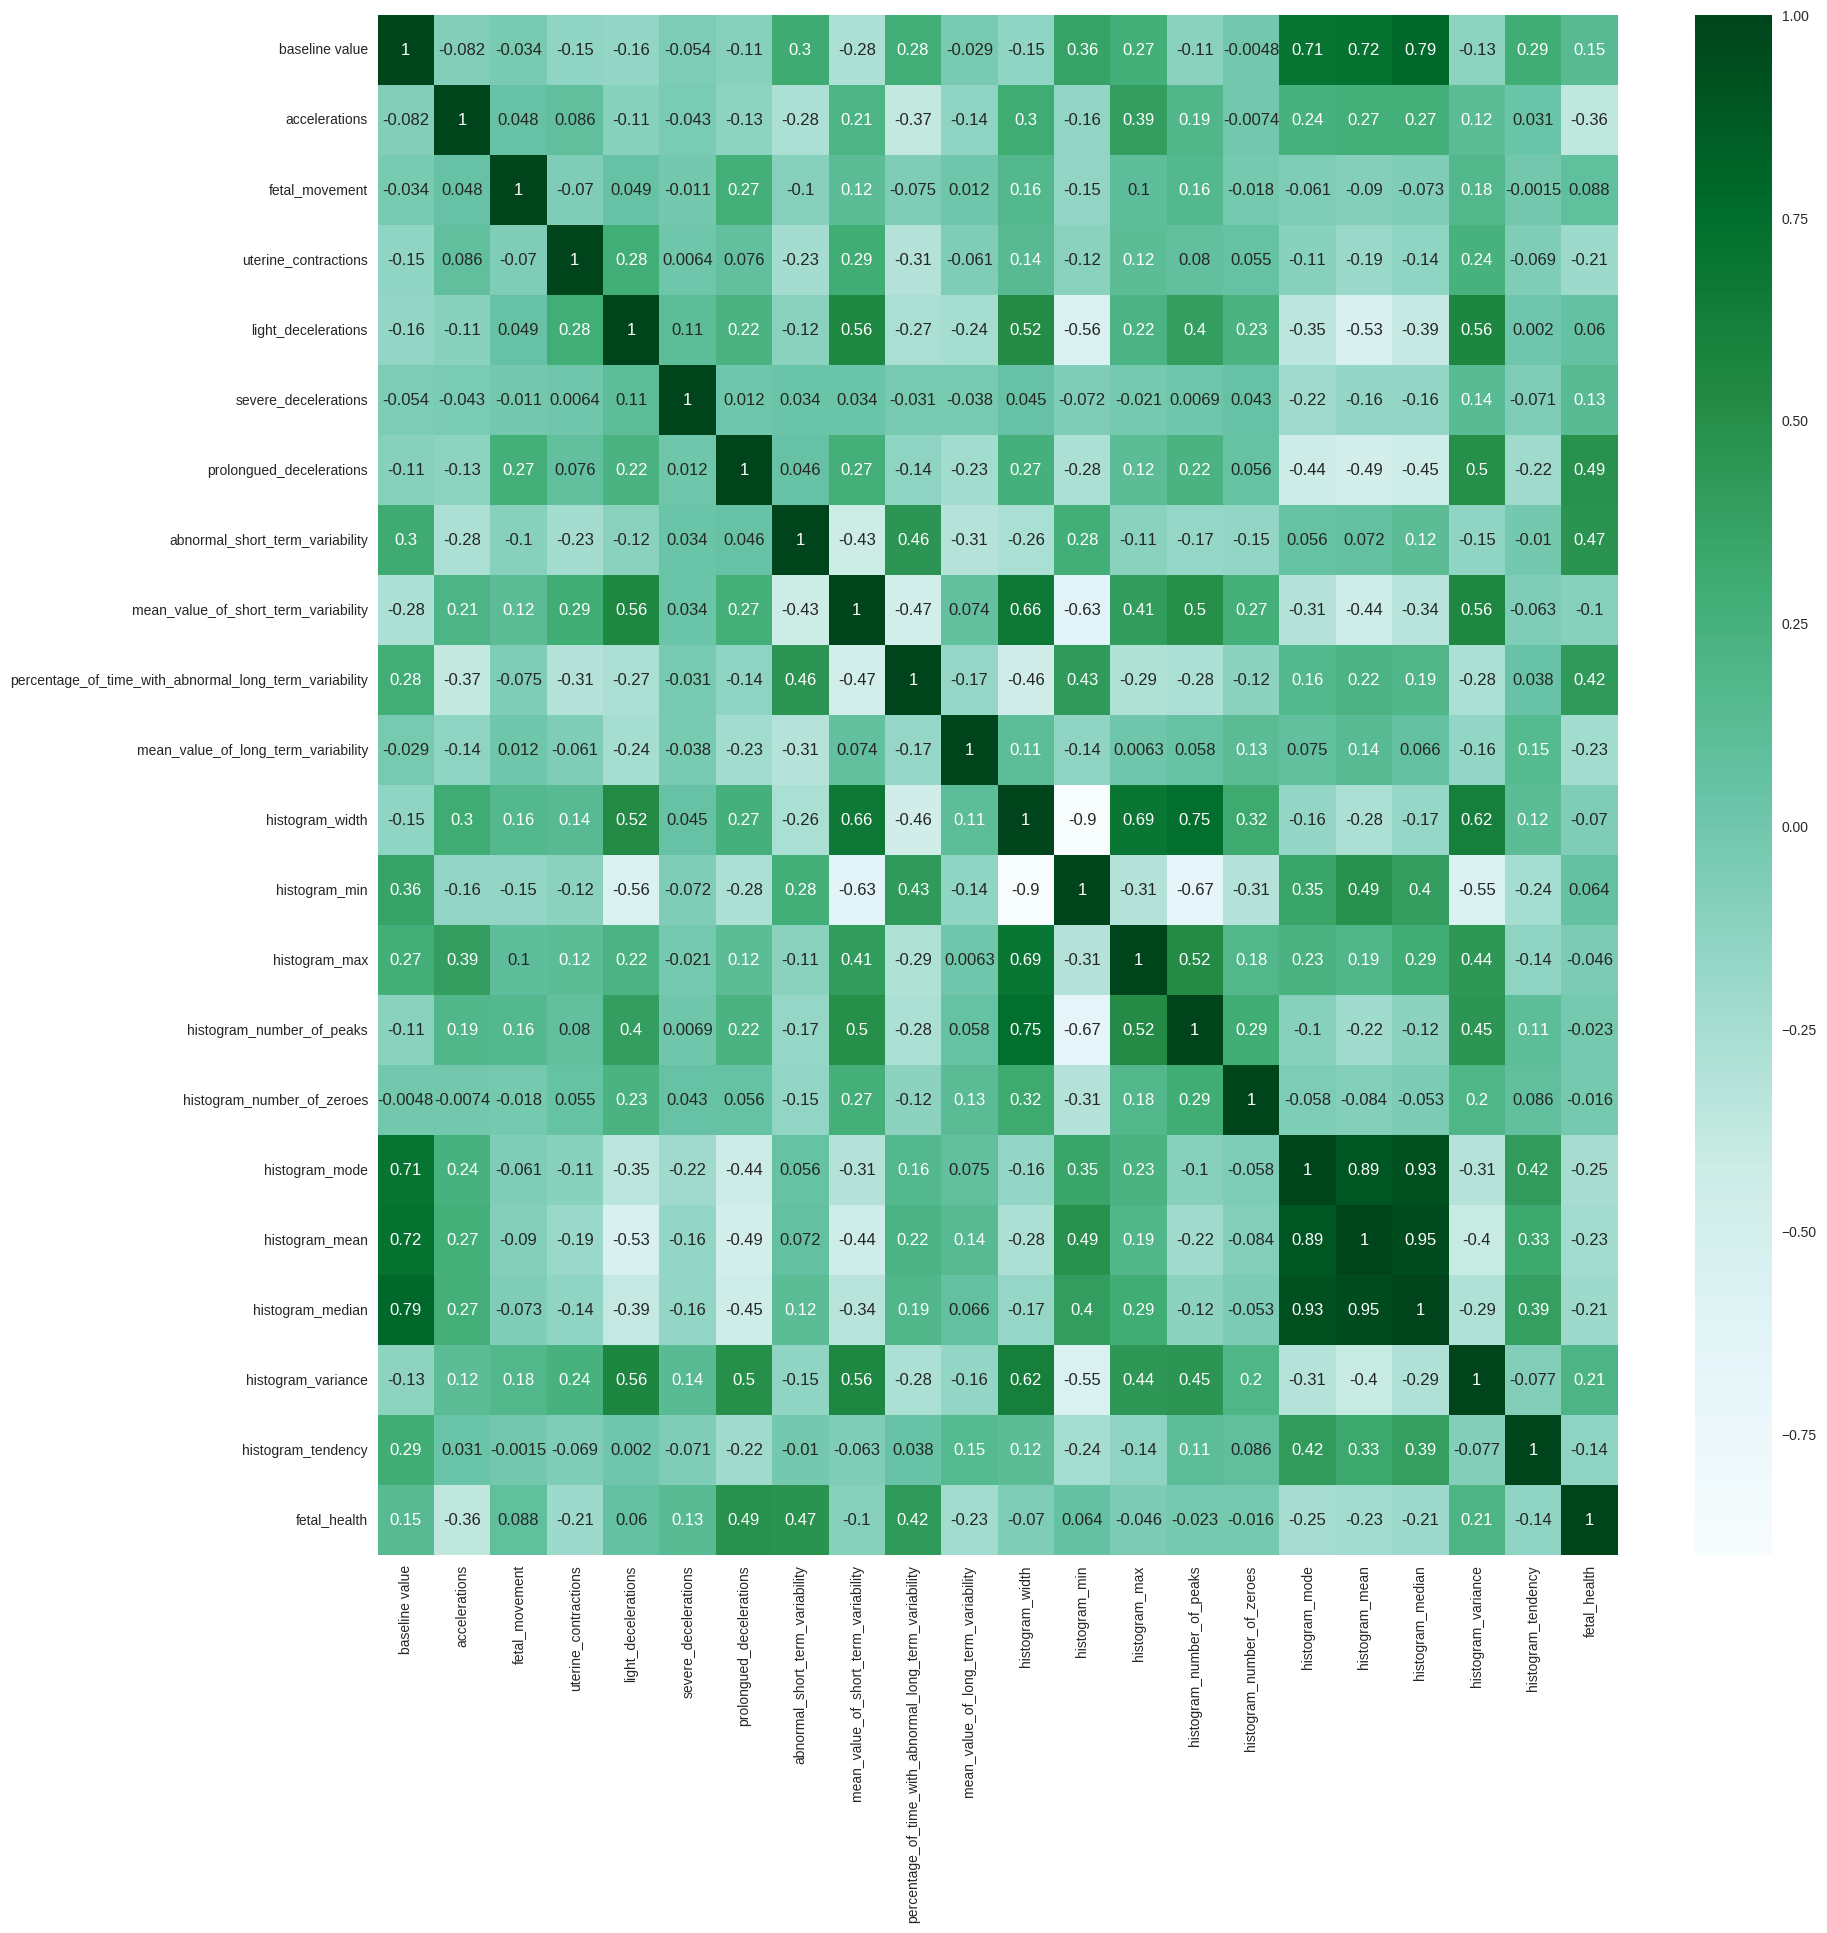

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='BuGn')
plt.show()

Beberapa kolom berkorelasi kuat dan ada yang berkorelasi negatif

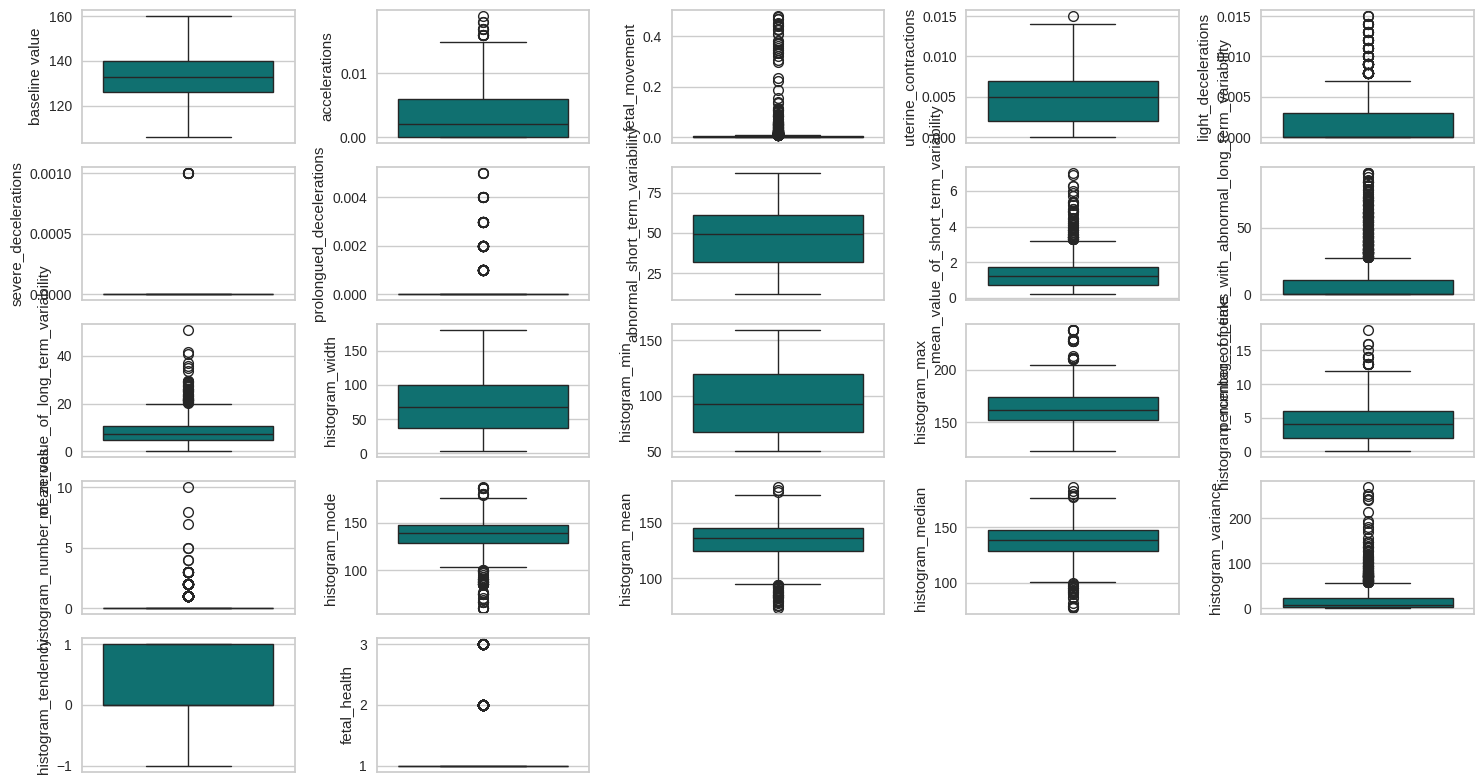

In [ ]:
plt.figure(figsize=(15,8))
for i, column_name in enumerate(df.columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(df[column_name], color='teal')
    plt.tight_layout()

## Machine Learning Models building

In [ ]:
df2 = df.copy()
X = df2.drop('fetal_health', axis=1)
y = df2['fetal_health']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model KNeighbors Classifier
Cross Validation accuracy:  0.8934911242603552
Test Accuracy:  0.9101654846335697

Confusion Matrix:


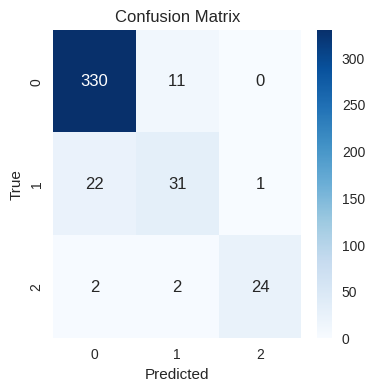


Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95       341
         2.0       0.70      0.57      0.63        54
         3.0       0.96      0.86      0.91        28

    accuracy                           0.91       423
   macro avg       0.87      0.80      0.83       423
weighted avg       0.90      0.91      0.91       423


Model Support Vector Machine
Cross Validation accuracy:  0.8982248520710059
Test Accuracy:  0.9361702127659575

Confusion Matrix:


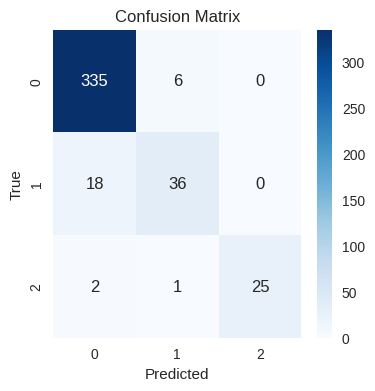


Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       341
         2.0       0.84      0.67      0.74        54
         3.0       1.00      0.89      0.94        28

    accuracy                           0.94       423
   macro avg       0.93      0.85      0.88       423
weighted avg       0.93      0.94      0.93       423


Model Naive Bayes Classifier
Cross Validation accuracy:  0.7301775147928995
Test Accuracy:  0.735224586288416

Confusion Matrix:


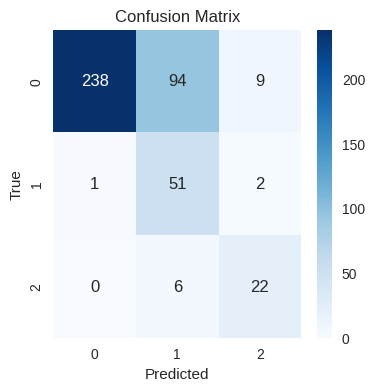


Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      0.70      0.82       341
         2.0       0.34      0.94      0.50        54
         3.0       0.67      0.79      0.72        28

    accuracy                           0.74       423
   macro avg       0.67      0.81      0.68       423
weighted avg       0.89      0.74      0.77       423


Best Model:  Pipeline(steps=[('model', SVC(random_state=42))])


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# create a list of models to evaluate

initial_accuracy = {}

models = [
    ('KNeighbors Classifier', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Naive Bayes Classifier', GaussianNB())


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    initial_accuracy[name] = accuracy

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

    #Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline



# Retrieve the best model
print("Best Model: ", best_model)

## SMOTE dan Hyperparameter tuning

In [ ]:
from imblearn.over_sampling import SMOTE
print("Sebelum SMOTE: ",y.value_counts())
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Setelah SMOTE: ",y_resampled.value_counts())

Sebelum SMOTE:  fetal_health
1.0    1646
2.0     292
3.0     175
Name: count, dtype: int64
Setelah SMOTE:  fetal_health
2.0    1646
1.0    1646
3.0    1646
Name: count, dtype: int64


In [ ]:
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[-1.03884978, -0.52550159, -0.1410747 , ..., -0.50010703,
        -0.58192558, -0.37320998],
       [-1.3429281 , -0.52550159, -0.23753094, ..., -0.50010703,
        -0.55878856,  1.22711127],
       [-1.54564699, -0.52550159, -0.23753094, ..., -1.62678907,
         0.86494979, -0.80557727],
       ...,
       [ 1.29241738, -0.52550159, -0.23753094, ...,  1.41366548,
        -0.58192558,  0.06917363],
       [-0.22797424, -0.52550159, -0.23753094, ..., -0.0079941 ,
        -0.58192558, -0.37652291],
       [ 0.07610408,  1.83719836, -0.23753094, ...,  0.48411883,
        -0.51251454, -0.37652291]])

In [ ]:
def hyperparameter_tuning(X, y, models):
    # Define dictionary to store results
    results = {}

    # Perform hyperparameter tuning for each model
    for model_name, model in models.items():
    # Define parameter grid for hyperparameter tuning
        param_grid = {}
        if model_name == 'KNN':
          param_grid = {'n_neighbors': [3, 5, 7, 9]}
        elif model_name == 'NB':
          param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
        elif model_name == 'SVM':
          param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}


        # Perform hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)

        # Get best hyperparameters and evaluate on test set
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results in dictionary
        results[model_name] = {'best_params': best_params, 'accuracy': accuracy}

    return results

In [ ]:
# Define models dictionary
models = {
    "NB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Example usage:
results = hyperparameter_tuning(X_train, y_train, models)
for model_name, result in results.items():
    print("Model:", model_name)
    print("Best hyperparameters:", result['best_params'])
    print("Accuracy:", result['accuracy'])
    print()

Model: NB
Best hyperparameters: {'var_smoothing': 1e-06}
Accuracy: 0.7601214574898786

Model: KNN
Best hyperparameters: {'n_neighbors': 3}
Accuracy: 0.9645748987854251

Model: SVM
Best hyperparameters: {'C': 100, 'gamma': 0.1}
Accuracy: 0.979757085020243



Model KNeighbors Classifier
Cross Validation accuracy:  0.9562025316455696
Test Accuracy:  0.9645748987854251

Confusion Matrix:


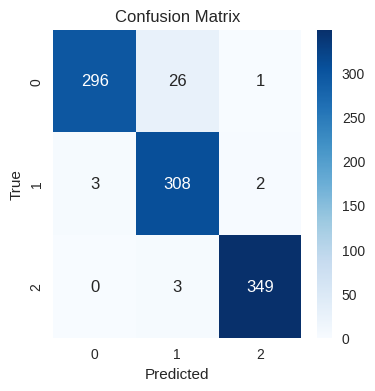


Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       323
         2.0       0.91      0.98      0.95       313
         3.0       0.99      0.99      0.99       352

    accuracy                           0.96       988
   macro avg       0.97      0.96      0.96       988
weighted avg       0.97      0.96      0.96       988


Model Support Vector Machine
Cross Validation accuracy:  0.9774683544303798
Test Accuracy:  0.979757085020243

Confusion Matrix:


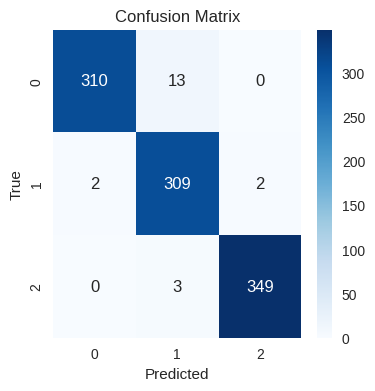


Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.96      0.98       323
         2.0       0.95      0.99      0.97       313
         3.0       0.99      0.99      0.99       352

    accuracy                           0.98       988
   macro avg       0.98      0.98      0.98       988
weighted avg       0.98      0.98      0.98       988


Model Naive Bayes Classifier
Cross Validation accuracy:  0.769873417721519
Test Accuracy:  0.7601214574898786

Confusion Matrix:


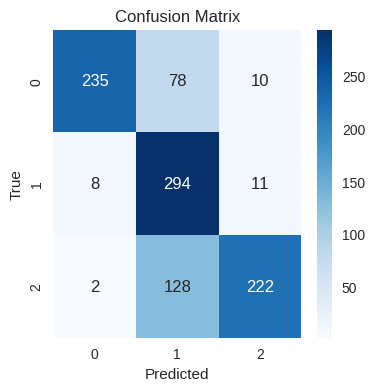


Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.73      0.83       323
         2.0       0.59      0.94      0.72       313
         3.0       0.91      0.63      0.75       352

    accuracy                           0.76       988
   macro avg       0.82      0.77      0.77       988
weighted avg       0.83      0.76      0.77       988




In [ ]:
tuned_accuracy = {}

models = [
    ('KNeighbors Classifier', KNeighborsClassifier(n_neighbors=3)),
    ('Support Vector Machine', SVC(random_state=42,C=100, gamma=0.1)),
    ('Naive Bayes Classifier', GaussianNB(var_smoothing = 1e-06))


]

best_model = None
best_accuracy = 0.0

#Iterate over the models and evaluate their performance
for name, model in models:
    #create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # perform cross validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    #fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # make prediction on the test data
    y_pred = pipeline.predict(X_test)

    #Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    tuned_accuracy[name] = accuracy

    #print the performance metrics
    print("Model", name)
    print("Cross Validation accuracy: ", mean_accuracy)
    print("Test Accuracy: ", accuracy)
    print()

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print()

    classification_rep = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(classification_rep)
    print()

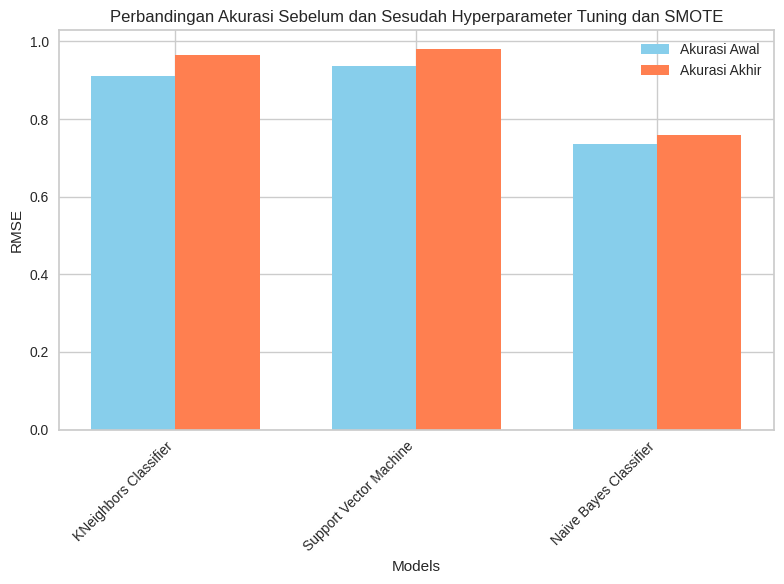

In [ ]:
model_names = list(initial_accuracy.keys())

initial_accuracy_values = list(initial_accuracy.values())
tuned_accuracy_values = list(tuned_accuracy.values())

bar_width = 0.35

index = np.arange(len(model_names))

plt.figure(figsize=(8, 6))
plt.bar(index, initial_accuracy_values, bar_width, label='Akurasi Awal', color='skyblue')
plt.bar(index + bar_width, tuned_accuracy_values, bar_width, label='Akurasi Akhir', color='coral')

plt.xlabel("Models")
plt.ylabel("RMSE")
plt.title("Perbandingan Akurasi Sebelum dan Sesudah Hyperparameter Tuning dan SMOTE")
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend()

plt.tight_layout()

plt.show()

1. KNN
- Cross Validation akurasi sebelum hyperparameter: **94.56%**
- Akurasi sebelum hyperparameter: **94.83%**

**Selisih kinerja validasi dan data uji relatif kecil, menandakan modelnya tidak overfitting**
- Hyperparameter `n_neighbors = 3`
- Cross validation akurasi setelah hyperparameter: **95.62%**
- Akurasi setelah hyperparameter: **96.46%**

**Terjadi kenaikan akurasi setelah hyperparameter**
2. SVM
- Cross Validation akurasi sebelum hyperparameter: **93.44%**
- Akurasi sebelum hyperparameter: **93.82%**

**Selisih kinerja validasi dan data uji relatif kecil, menandakan modelnya tidak overfitting**
- Hyperparameter `C = 100, gamma = 0.1`
- Cross validation akurasi setelah hyperparameter: **97.75%**
- Akurasi setelah hyperparameter: **97.98%**

**Terjadi kenaikan akurasi yang lumayan tinggi setelah hyperparameter**
3. Naive Bayes
- Cross Validation akurasi sebelum hyperparameter: **75.95%**
- Akurasi sebelum hyperparameter: **74.39%**

**Akurasi yang didapatkan lebih rendah daripada 2 model sebelumnya, model ini kurang mampu untuk menangani data dengan baik**
- Hyperparameter `var_smoothing = 1e-06`
- Cross validation akurasi setelah hyperparameter: **76.98%**
- Akurasi setelah hyperparameter: **76.01%**

**Akurasi yang didapatkan meningkat daripada sebelumnya, namun masih tergolong lemah untuk menangani data**





